# Assignment Week 14 


### 1. 非线性一阶常微分方程的周期性
Consider a simple ecosystem consisting of rabbits that have an infinite supply of food and foxes that prey on the rabbits for their food. This is modeled by a pair of nonlinear, first-order differential equations: 
$$
\begin{aligned}
\frac{dr}{dt}&=2r -\alpha rf, \;r(0) = r_0,\\
\frac{df}{dt}&=-f + \alpha rf, \;f (0) = f_0\end{aligned} 
$$
where $t$ is time, $r(t)$ is the number of rabbits, $f (t)$ is the number of foxes, and $\alpha$ is a positive constant.
   * If $\alpha = 0$, the two populations do not interact, the rabbits do what rabbits do best, and the foxes die off from starvation.

   * If $\alpha > 0$, the foxes encounter the rabbits with a probability that is proportional to the product of their numbers.
The equations must be solved numerically. It turns out that the solutions are always periodic, with a period that depends on the initial conditions. In other words, for any $r(0)$ and $f (0)$, there is a value $t = t_p$ when both populations return to their original values. Consequently, for all $t$,
$$
\begin{aligned}
r(t + t_p) = r(t), \;f (t + t_p) = f (t)
\end{aligned}
$$

(1) Compute the solution with $r_0 = 300$, $f_0 = 150$, and $\alpha = 0.01$. You should find that $t_p$ is close to 5. Make two plots, one of $r$ and $f$ as functions of $t$ and one a phase plane plot with $r$ as one axis and $f$ as the other.

In [1]:
from ode_solver import rk4,heun
from root_solver import secant
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys

In [2]:
r0 = 300; f0 = 150  #初始条件
y0 = np.array([r0,f0])
ti = 0; tf = 6.; dt = 0.02
t = np.arange(ti,tf+dt,dt)

In [3]:
def drive_func(y,t,args=None): #驱动方程
    alpha = 0.01
    dydx = [2*y[0]-alpha*y[0]*y[1], -y[1]+alpha*y[0]*y[1]]
    return dydx

In [4]:
def solve_ode(y_initial,time):  #调用ode_solver.py中的库函数rk4解常微分方程组
    y = rk4(drive_func,y_initial,time)
    return y

In [5]:
def root_func(tf):  #为求周期 t_p 构造进行需要寻根的函数
    r0 = 300; f0 = 150.
    y0 = np.array([r0,f0])
    ti = 0; dt = 0.02
    t = np.arange(ti,tf+dt,dt)
    res = solve_ode(y0,t)[-1,1] - f0  #寻找与初始值相同的f[t]值对应的tf而构造的函数
    return res

In [6]:
def period_secant():  #用root_solver.py 中的secant方法计算零点，及 t_p
    period,_ = secant(root_func,4.,6.,1e-4)  #由图像确定基本区间
    print(r'the period time is t_p = {:.3f}'.format(period))
    return period

the period time is t_p = 4.985


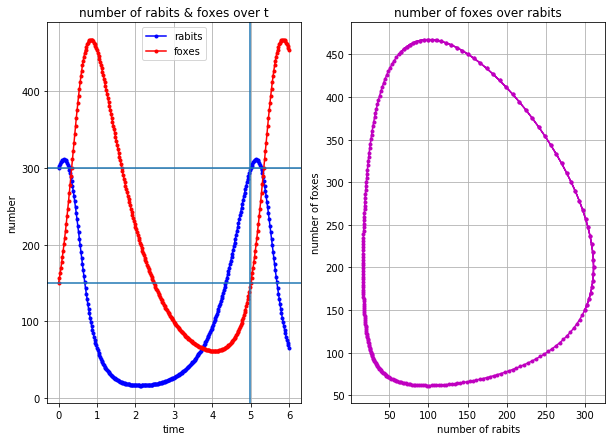

In [7]:
y = solve_ode(y0,t)
fig,ax = plt.subplots(1,2,figsize=(10,7))   
ax[0].plot(t,y[:,0],'b.-', t,y[:,1],'r.-')
ax[0].grid('on')    # 网格线
ax[0].set_xlabel('time')
ax[0].set_ylabel('number')
ax[0].legend(['rabits','foxes'])
ax[0].set_title('number of rabits & foxes over t')
ax[0].axhline(300)
ax[0].axhline(150)
ax[1].plot(y[:,0],y[:,1],'m.-')
ax[1].grid('on')    # 网格线
ax[1].set_xlabel('number of rabits')
ax[1].set_ylabel('number of foxes')
ax[1].set_title('number of foxes over rabits')
tp = period_secant()
ax[0].axvline(tp)

最终算出来，兔子和狐狸的数量随时间变化是有周期性的，这个周期为 $t_p = 4.985$。  
捕食者的数量变化晚于被捕食者，当初始值: 兔子数量 > 狐狸数量时，兔子和狐狸的数量周期变化相对较平缓。    
图2，兔子和狐狸的数量关系是一个圈，表明了数量变化的周期性，在兔子数量变化的周期内，狐狸也在周期变化。

(2) Compute and plot the solution with $r_0 = 15$, $f_0 = 22$, and $\alpha = 0.01$. You should find that $t_p$ is close to 6.62.

In [8]:
r0 = 15; f0 = 22  #初始条件
y0 = np.array([r0,f0])
ti = 0; tf = 12.; dt = 0.02
t = np.arange(ti,tf+dt,dt)

In [9]:
def secant(f, x0, x1, eps):  #secant方法
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x0 - f_x1) > eps and iteration_counter < 100:
        try:
            denominator = (f_x1 - f_x0)/(x1 - x0)
            x = x1 - f_x1/denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x)
            sys.exit(1) # Abort with error
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter = iteration_counter + 1
    # Here, either a solution is found, or too many iterations
    if abs(x0 - x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [10]:
def root_func(tf):    #为求周期 t_p 构造进行需要寻根的函数
    r0 = 15.; f0 = 22.
    y0 = np.array([r0,f0])
    ti = 0; dt = 0.02
    t = np.arange(ti,tf+dt,dt)
    res = solve_ode(y0,t)[-1,1] - f0
    return res

In [11]:
def period_secant_1():
    period,_ = secant(root_func,6.,7.,1e-3) #由图像确定基本区间
    print(r'the period time is t_p = {:.3f}'.format(period))
    return period

the period time is t_p = 6.618


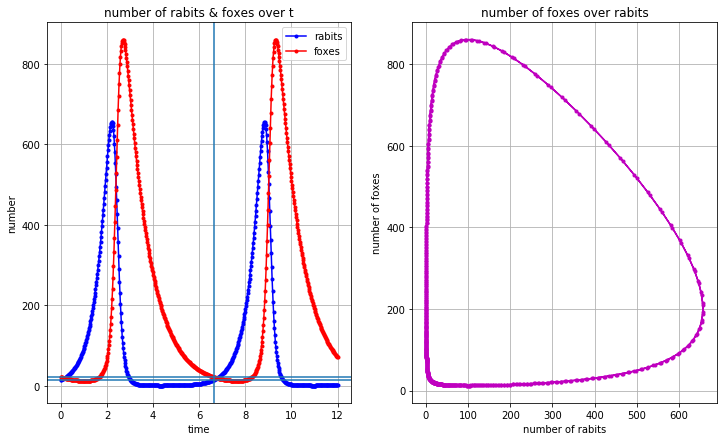

In [12]:
y = solve_ode(y0,t)
fig,ax = plt.subplots(1,2,figsize=(12,7))   
ax[0].plot(t,y[:,0],'b.-', t,y[:,1],'r.-')
ax[0].grid('on')    
ax[0].set_xlabel('time')
ax[0].set_ylabel('number')
ax[0].legend(['rabits','foxes'])
ax[0].set_title('number of rabits & foxes over t')
ax[0].axhline(15)
ax[0].axhline(22)
ax[1].plot(y[:,0],y[:,1],'m.-')
ax[1].grid('on')    
ax[1].set_xlabel('number of rabits')
ax[1].set_ylabel('number of foxes')
ax[1].set_title('number of foxes over rabits')
tp = period_secant_1()
ax[0].axvline(tp)

最终算出来，兔子和狐狸的数量随时间变化是有周期性的，这个周期为 tp = 6.615。
捕食者的数量变化晚于被捕食者，当初始值: 兔子数量 < 狐狸数量，且两者数量接近时，兔子和狐狸的数量周期变化相对剧烈，形成尖峰。

(3) Compute and plot the solution with $r_0 = 102$, $f_0 = 198$, and $\alpha = 0.01$. Determine the period $t_p$ by trial-and-error method.

In [13]:
r0 = 102; f0 = 198   #初始条件
y0 = np.array([r0,f0])
ti = 0.; tf = 12.; dt = 0.02
t_new = np.arange(ti,tf+dt,dt)

In [14]:
def solve_ode(y_initial,time):  #调用ode_solver.py中的库函数heun解常微分方程组
    y = heun(drive_func,y_initial,time)
    return y

In [15]:
def root_func(tf):
    r0 = 102; f0 = 198.
    y0 = np.array([r0,f0])
    ti = 0; dt = 0.02
    t = np.arange(ti,tf+dt,dt)
    res = solve_ode(y0,t)[-1,1] - f0
    return res

In [16]:
def period_secant_2():
    period,_ = secant(root_func,4.,5.,1e-3)  #由图像确定基本区间
    print('the period time is t_p = {:.3f}'.format(period))
    return period

the period time is t_p = 4.439


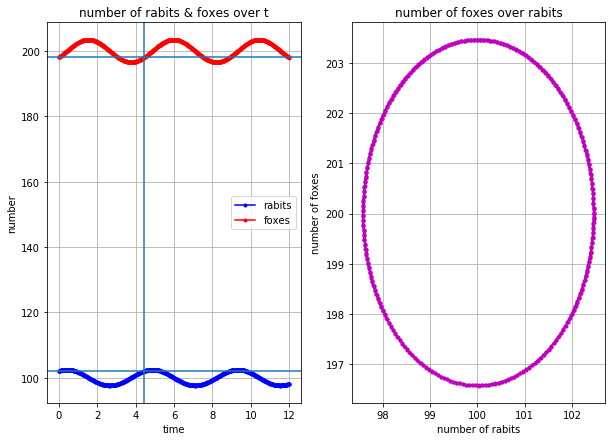

In [17]:
y = solve_ode(y0,t_new)
fig,ax = plt.subplots(1,2,figsize=(10,7))   
ax[0].plot(t_new,y[:,0],'b.-', t_new,y[:,1],'r.-')
ax[0].grid('on')    
ax[0].set_xlabel('time')
ax[0].set_ylabel('number')
ax[0].legend(['rabits','foxes'])
ax[0].set_title('number of rabits & foxes over t')
ax[0].axhline(102)
ax[0].axhline(198)
ax[1].plot(y[:,0],y[:,1],'m.-')
ax[1].grid('on')    
ax[1].set_xlabel('number of rabits')
ax[1].set_ylabel('number of foxes')
ax[1].set_title('number of foxes over rabits')
tp = period_secant_2()
ax[0].axvline(tp)

最终算出来，兔子和狐狸的数量随时间变化是有周期性的，这个周期为 tp = 4.439。
捕食者的数量变化晚于被捕食者，当初始值: 兔子数量 < 狐狸数量，且两者数量差距较大时，兔子和狐狸的数量周期变化相对平缓，变化幅度很小。

#### 2. Your task is to calculate the precession of the perihelion of Mercury.
**The** force law predicted by general relativity is 
$$
F_G \simeq \frac{GM_SM_M}{r^2}\left(1 +\frac{\alpha}{r^2}\right)
$$

where $M_M$ is the mass of Mercury and $\alpha\simeq 1.1\times 10^{-8}\ {\rm AU}^2$. 

**Since** the precision rate is fairly small, we develop the algorithm as follows:

- We calculate the rate of precession as a function of $\alpha$, with values of $\alpha$ that are much larger than the actual value for Mercury. It turns out that the rate of precession is given by $C\alpha$, where $C$ is a constant whose value we shall estimate. 
- After we have obtained the values of $C$, we can then estimate the rate of precession for $\alpha = 1.1\times 10^{-8}\ {\rm AU}^2$, which is the case that we are really interested in. 

**The** initial conditions are given based on the following considerations

(a) the length of the semimajor axis for Mercury's orbit is $a = 0.39$ AU.  
(b) The corresponding velocity, $v_1$, can be computed based on the conservation of both energy and angular momentum over the course of an orbit. It shows
$$
v_1 =\sqrt{\frac{GM_S (1 - e)}{a (1 + e)}}
$$
where $e = 0.206$ for Mercury. The distance from Mercury to the Sun is $r_{1}=\left(1+e\right)  a=0.47$ AU.

**Hint**:  Choose yr and AU as the time and length units. It can be shown that 
$$
GM_S=4\pi^2 \text{ AU}^3/\text{yr}^2
$$



**Answer**:

Solve the ODEs for $(v_x,\ v_y,\ \theta, \ r)$
$$
\left\{
\begin{aligned}
\frac{{\rm d}v_x}{{\rm d}t}&=-\frac{GM_s}{r^2}\left(1+\frac{\alpha}{r^2}\right)\cos\theta\\
\frac{{\rm d}v_x}{{\rm d}t}&=-\frac{GM_s}{r^2}\left(1+\frac{\alpha}{r^2}\right)\sin\theta\\
\frac{{\rm d}\theta}{{\rm d}t}&=\frac{1}{r}(v_y\cos\theta-v_x\sin\theta)\\
\frac{{\rm d}r}{{\rm d}t}&=v_x\cos\theta+v_y\sin\theta
\end{aligned}
\right.
$$

by using the RK4 method, where $(v_x,\ v_y)$ is the velocity of Mercury and $(\theta,\ r)$ is the polar coordinate of the position of Mercury.

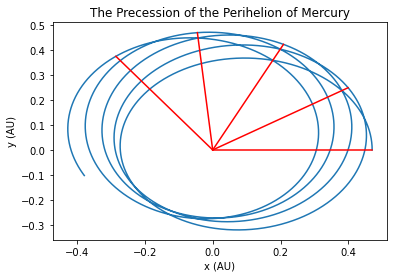

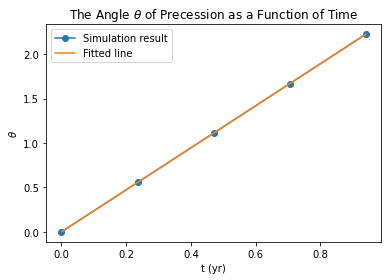

Precession Rate = 2.365084152652766


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def RK4(f, t0, y0, t1, h):
    t = np.arange(t0, t1 + h, h)
    N = len(t)
    y = np.zeros([N, len(y0)])
    y[0] = y0
    for i in range(N-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1*h/2, t[i] + h/2)
        k3 = f(y[i] + k2*h/2, t[i] + h/2)
        k4 = f(y[i] + k3*h, t[i] + h)
        y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, y

def fit(x, y):
    return sum(x*y) / sum(x**2)

alpha = 0.01

e = 0.206
a = 0.39
GMs = 4 * np.pi**2

r1 = (1+e) * a
v1 = np.sqrt(GMs * (1-e) / r1)

# the initial conditions
t0 = 0
y0 = np.array([0, v1, 0, r1])

def f(y, t):  # the driving function
    fun = np.zeros(4)
    fun[0] = -GMs / y[3]**2 * (1 + alpha / y[3]**2) * np.cos(y[2])
    fun[1] = -GMs / y[3]**2 * (1 + alpha / y[3]**2) * np.sin(y[2])
    fun[2] = (y[1] * np.cos(y[2]) - y[0] * np.sin(y[2])) / y[3]
    fun[3] = y[0] * np.cos(y[2]) + y[1] * np.sin(y[2])
    return fun

# solve the ODEs with the RK4 method
t, ys = RK4(f, t0, y0, 1, 1e-4)  

vx = ys[:, 0]
vy = ys[:, 1]
angle = ys[:, 2]
r = ys[:, 3]

x = r * np.cos(angle)
y = r * np.sin(angle)

# find the farthest points and the corresponding angles theta
index = [0]
for i in range(1, len(r)):
    if r[i]>r[i-1] and r[i]>r[i+1]:
        index.append(i)
theta = np.array([angle[index[i]]-2*np.pi*i for i in range(len(index))])

rate = fit(t[index], theta)  # get the precession rate by fitting

plt.title('The Precession of the Perihelion of Mercury')
plt.plot(x, y)
for i in range(len(index)):
    plt.plot([0, x[index[i]]], [0, y[index[i]]], 'r')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.show()

plt.title(r'The Angle $\theta$ of Precession as a Function of Time')
plt.plot(t[index], theta, 'o-')
plt.plot(t[index], rate*t[index])
plt.xlabel('t (yr)')
plt.ylabel(r'$\theta$')
plt.legend(['Simulation result', 'Fitted line'])
plt.show()

print('Precession Rate =', rate)

Now calculate the precession rate of different values of $\alpha$ and estimate the value of $C$.

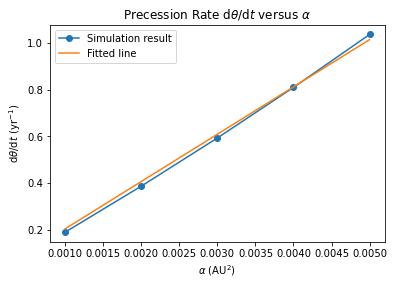

C = 203.19335027293718


In [7]:
def precession_rate(alpha=0.01):
    def f(y, t):  # the driving function
        fun = np.zeros(4)
        fun[0] = -GMs / y[3]**2 * (1 + alpha / y[3]**2) * np.cos(y[2])
        fun[1] = -GMs / y[3]**2 * (1 + alpha / y[3]**2) * np.sin(y[2])
        fun[2] = (y[1] * np.cos(y[2]) - y[0] * np.sin(y[2])) / y[3]
        fun[3] = y[0] * np.cos(y[2]) + y[1] * np.sin(y[2])
        return fun

    # solve the ODEs with the RK4 method
    t, ys = RK4(f, t0, y0, 1, 0.0001)

    vx = ys[:, 0]
    vy = ys[:, 1]
    angle = ys[:, 2]
    r = ys[:, 3]
    
    # find the farthest points and the corresponding angles theta
    index = [0]
    for i in range(1, len(r)):
        if r[i]>r[i-1] and r[i]>r[i+1]:
            index.append(i)
    theta = np.array([angle[index[i]]-2*np.pi*i for i in range(len(index))])

    rate = fit(t[index], theta)  # get the precession rate by fitting
    
    return rate

alphs = np.arange(0.001, 0.006, 0.001)
rates = np.array([precession_rate(alp) for alp in alphs])

C = fit(alphs, rates)  # get the constant C by fitting

plt.title(r'Precession Rate ${\rm d}\theta/{\rm d}t$ versus $\alpha$')
plt.xlabel(r'$\alpha\ ({\rm AU}^2)$')
plt.ylabel(r'${\rm d}\theta/{\rm d}t\ ({\rm yr}^{-1})$')
plt.plot(alphs, rates, 'o-')
plt.plot(alphs, C*alphs)
plt.legend(['Simulation result', 'Fitted line'])
plt.show()

print('C =', C)

We can estimate $C\approx 200$, so the precession rate of $\alpha=1.1\times 10^{-8}$ is
$$
\frac{{\rm d}\theta}{{\rm d}t}=C\alpha\approx2.2\times10^{-6}\ {\rm yr}^{-1}
$$

<font size=6 color=red> 可以采用不同的算法、步长去比较误差的大小，也可以通过计算alpha=0时是否有进动，或者多选取几个周期看总能量是否守恒来评估算法的正确性。

### 3. the IVP
$$
\frac{dy}{dt}  + 100y = (99t + 1) e^{-t} ,\; y(0) = 1 
$$
The exact solution is 
$$ y = e^{-100t} + te^{-t} $$
Apply forward Euler's method with $h = 0.1$ and plot the solution estimates versus $0 \leq t \leq 1$. Repeat with $h = 0.01$ and plot versus $0\leq t \leq 5$. Discuss on your results.

In [25]:
from ode_solver import forward_euler

def drive_func(y,t,args=None):
    dydt = (99*t+1)*np.exp(-t)-100*y
    return dydt

def solve_ode(h,tf):
    y0 = np.array([1.])
    t = np.arange(0,tf+h,h)
    y = forward_euler(drive_func,y0,t)
    return y


In [26]:
def plot_ode():
    fig,ax = plt.subplots(1,2,figsize=(12,7))
    h1 = 0.1; tf1 = 1.
    y1 = solve_ode(h1, tf1)
    t1 = np.arange(0., tf1+h1, h1)
    y_ture1 = np.exp(-100*t1)+t1*np.exp(-t1)
    ax[0].plot(t1, y1, 'b.-', t1, y_ture1,'y--')
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('y')    
    ax[0].set_title(r'$y^\prime = - 100y + (99t + 1) e^{-t}$')
    ax[0].legend(['h=0.1','ture'])
    
    h2 = 0.01; tf2 = 5.
    y2 = solve_ode(h2, tf2)
    t2 = np.arange(0., tf2+h2, h2)
    y_ture2 = np.exp(-100*t2)+t2*np.exp(-t2)
    ax[1].plot(t2, y2, 'r.-',t2, y_ture2,'c--')
    ax[1].set_xlabel('t')
    ax[1].set_ylabel('y')    
    ax[1].set_title(r'$y^\prime = - 100y + (99t + 1) e^{-t}$')
    ax[1].legend(['h=0.01','ture'])

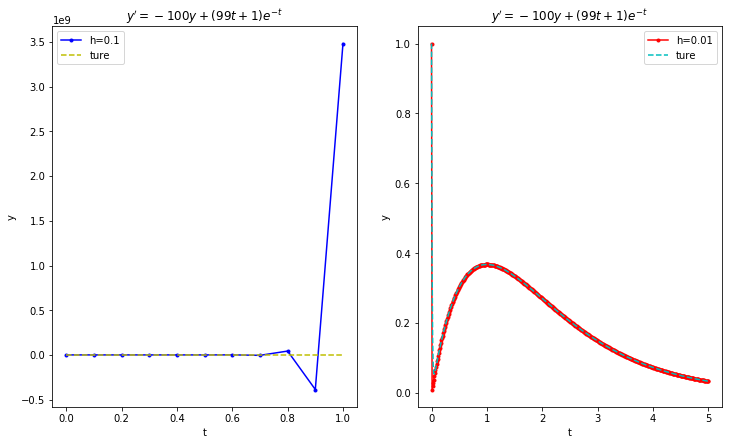

In [27]:
if __name__ == '__main__':
    plot_ode()

步长h=0.1时的结果与真实解在x=0.8以后差距极大，而h=0.01时，数值模拟结果与实际结果十分接近。   
不同的步长会给常微分方程的求解带来很大的变化，因为驱动函数可能波动较大，步长太大可能会忽略一些信息，所以步长应该取得比较合适才能得到正确的解。

### 4 shooting method 解微分方程

4. Use shooting method to solve the given boundary problem using step sizes $h=0.05$. Plot your approximate solutions and the actual solutions on the same coordinate system.
   
    (1) $y^{\prime\prime}=2y^{\prime}-y+x^{2}-1$ over $\left[  0,1\right]$ with $y\left(  0\right)  =5$ and $y\left(  1\right)  =10$, exact solution $y\left(  x\right)   =x^{2}+4x+5$

    (2) $y^{\prime\prime}+\left(  1/x\right)  y^{\prime}+(1-1/\left(4x^{2}\right)  )y=0$ over $\left[  1,6\right]$ with $y\left(  1\right)  =1$ and $y\left(  6\right)  =0$, exact solution $y\left(  x\right)  =\dfrac{0.2913843206 \cos\left(  x\right)  +1.001299385\sin\left(  x\right)  }{\sqrt{x}}$


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from root_solver import bisection
from ode_solver import heun, rk4
import sys
%matplotlib inline

In [29]:
dx = 0.05
xlow = 0
xhigh = 1
x = np.arange(xlow,xhigh+dx,dx)

In [30]:
def drive_func(y,x,args=None):
    dydx = [y[1], 2*y[1] - y[0] + x*x -1]
    return dydx

In [31]:
def solve_ode(alpha):
    y0 = 5
    y0 = np.array([y0,alpha])   
    #y = heun(drive_func,y0,x)
    y = rk4(drive_func,y0,x)
    return y


In [32]:
def root_func(alpha): # alpha: y'(0)
    yL = 10
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

In [33]:
def plot_root_func(ax):
    alphas = np.linspace(-10,10,20)
    root_func_values = np.zeros(len(alphas))
    
    for idx,alpha in enumerate(alphas):
        root_func_values[idx] = root_func(alpha)
    
    ax.plot(alphas, root_func_values,'ro-')
    ax.grid('on')
    ax.axhline()

In [34]:
def shoot_bisection():
    # plot the function to seek the inital interval
    fig,ax = plt.subplots(1,2,figsize=(10,7))
    plot_root_func(ax[0])
    
    tol = 0.5e-4
    alpha, iteration_counter = bisection(root_func, 0, 5,tol)
    print(alpha)
    
    y = solve_ode(alpha)
    
    real_fun = lambda x: x*x + 4*x +5
    real_y = real_fun(x)
    
    ax[1].plot(x, y[:,0],'b.-')
    ax[1].plot(x, real_y, 'ro')
    ax[1].grid('on')    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title('$y^{\prime\prime}=2y^\prime-y+x^2-1, y(0) = 5, y(1) = 10$')
    ax[1].legend(["approximate solution", "real solutionn"])

3.9999961853027344


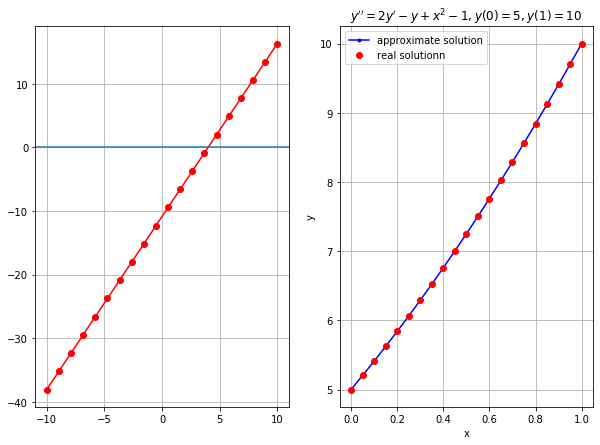

In [35]:
if __name__ == '__main__':
    shoot_bisection()

可以发现，真实解和模拟值能够非常好的拟合.

In [36]:
dx = 0.05
xlow = 1
xhigh = 6
x = np.arange(xlow,xhigh+dx,dx)

In [37]:
def drive_func2(y,x,args=None):
    dydx = [y[1], y[0]/(4*x*x) - y[1]/x - y[0]]
    return dydx

def solve_ode2(alpha):
    y0 = 1
    y0 = np.array([y0,alpha])   
    y = heun(drive_func2,y0,x)
    #y = rk4(drive_func2,y0,x)
    return y

def root_func2(alpha): # alpha: y'(0)
    yL = 0
    y = solve_ode2(alpha)
    res = y[-1,0] - yL
    return res 

def plot_root_func2(ax):
    alphas = np.linspace(-10,10,20)
    root_func_values = np.zeros(len(alphas))
    
    for idx,alpha in enumerate(alphas):
        root_func_values[idx] = root_func2(alpha)
    
    ax.plot(alphas, root_func_values,'ro-')
    ax.grid('on')
    ax.axhline()

-0.20252108573913574


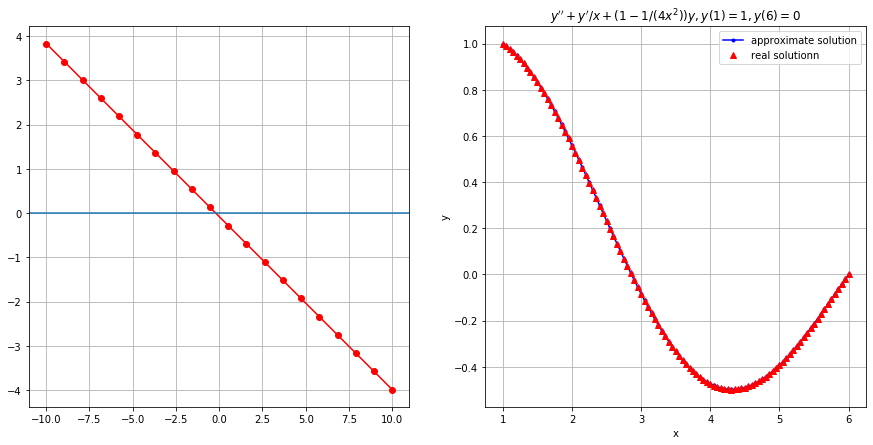

In [38]:
def shoot_bisection2():
    # plot the function to seek the inital interval
    fig,ax = plt.subplots(1,2,figsize=(15,7))
    plot_root_func2(ax[0])
    
    tol = 0.5e-4
    alpha, iteration_counter = bisection(root_func2, -100, 10,tol)
    print(alpha)
    
    y = solve_ode2(alpha)
     
    real_fun = lambda x: (0.2913843206*np.cos(x) + 1.001299385*np.sin(x)) / np.sqrt(x)
    real_y = real_fun(x)
    ax[1].plot(x, y[:,0],'b.-')
    ax[1].plot(x, real_y, 'r^')
    ax[1].grid('on')    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title('$y^{\prime\prime}+y^\prime/x+(1-1/(4x^2))y, y(1) = 1, y(6) = 0$')
    ax[1].legend(["approximate solution", "real solutionn"])
    
if __name__ == '__main__':
    shoot_bisection2()